# Classification 2

Nicholas Cunningham  
CAP 5610, Final Exam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

# The formatting inconsistencies were removed from the raw file
df = pd.read_csv('Exam Datasets\\classification_data2.txt',
                 header = 0, sep='\t')

X = df.iloc[:, 0:6].values
y = df.iloc[:, 7].values

## Split data into train and test set 80/20

The test set is partitioned off to determine a final performance metric for the 
best model found during training on new unseen, unlabeled data.

The remaining 80% of the data is used for training. 5-fold cross validation is 
performed on each model. The performance is measured using score on the validation set and the average performance across all 5 folds is 
calculated. Hyperparameters are tuned to improve the performance of each model.

In [2]:
# Split data into train and test set 80/20
X_Train, X_test, y_Train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [3]:
df.corr()

,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
kernel_length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
kernel_width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asym,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
groove_length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [4]:
df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


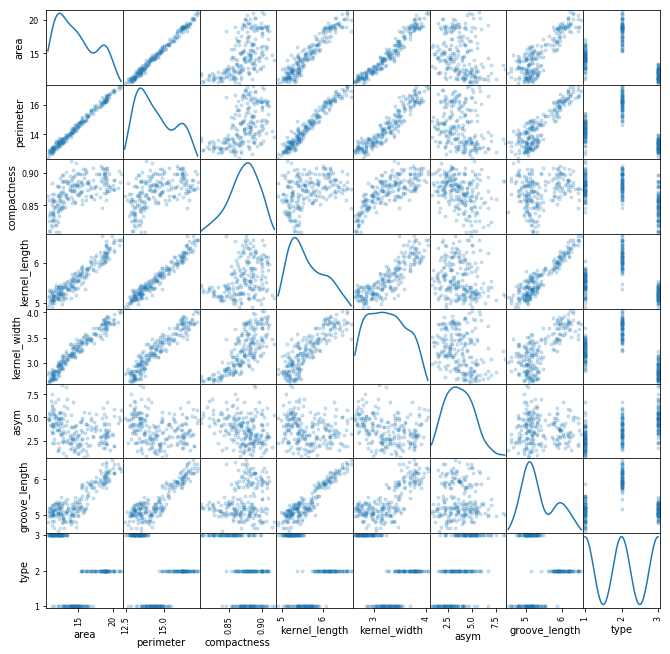

In [12]:
scatter_matrix(df, alpha=0.2, figsize=(11, 11), diagonal='kde')
plt.show()

## Analysis

KFold and GridSearchCV are used for cross validation and hyperparameter selection.

The performance metric score measures the normalized number of correctly classified data points.

The confusion matrix measures the number of correctly classified data points in each category and the number of misclassified points specifying the correct class and the predicted class. The score can be calculated by summing the diagonal elements and dividing by the total number of samples. The score works well for two class classification problems but becomes as harsh metric as the number of classes increases since the number of classes the data point can be classified as increases.

All attributes were maintained from the dataset.

### Logistic regression

In [6]:
# Logistic Regression
logistic = LogisticRegression(C=1.0, random_state=0)
scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, validation_index in kf.split(X_Train):
    X_train, X_validation = X[train_index], X[validation_index]
    y_train, y_validation = y[train_index], y[validation_index]
    
    logistic.fit(X_train, y_train)
    y_pred = logistic.predict(X_validation)
    score = logistic.score(X_validation, y_validation)
    print("Logistic Score:", score)
    print(confusion_matrix(y_validation, y_pred))
    scores.append(score)
print("\nMean accuracy:", np.mean(scores))

Logistic Score: 0.911764705882
[[10  2  0]
 [ 1 14  0]
 [ 0  0  7]]
Logistic Score: 0.882352941176
[[13  1  1]
 [ 1 15  0]
 [ 1  0  2]]
Logistic Score: 0.941176470588
[[12  2  0]
 [ 0 14  0]
 [ 0  0  6]]
Logistic Score: 0.909090909091
[[17  0  0]
 [ 1 10  0]
 [ 2  0  3]]
Logistic Score: 0.909090909091
[[11  0  1]
 [ 0 14  0]
 [ 2  0  5]]

Mean accuracy: 0.910695187166


### SVM

A soft-margin SVM was tested using C=[0.1,0.5,1,2,5] and three kernels: linear, polynomial, and rbf with the associated hyperparameters for each type of kernel.

A hard margin SVM was tested using C=1000 and the same 3 kernels as above.

In [7]:
# Support Vector Classifier

parameters = [{'kernel':['linear'], 'C':[0.1,0.5,1,2,5,1000]},
              {'kernel':['poly'], 'degree':[2,3], 'C':[0.1,0.5,1,2,5,1000]},
              {'kernel':['rbf'], 'gamma':[0.1,0.5,1,2,5], 'C':[0.1,0.5,1,2,5,1000]},
             ]
#parameters = {'kernel':['linear'], 'C':[0.1,0.5,1,2,5]}

svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5, verbose=0)
clf.fit(X_Train, y_Train)
print("Best estimator:", clf.best_estimator_)
print("Best score:", clf.best_score_)
print("Best parameters:", clf.best_params_)

Best estimator: SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best score: 0.910714285714
Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


### Ridge Classification

In [8]:
# Ridge Classification
parametersRidge = {}

ridge = RidgeClassifier(random_state=0)
clf2 = GridSearchCV(ridge, parametersRidge, cv=5, verbose=0)
clf2.fit(X_Train, y_Train)
print("Best estimator:", clf2.best_estimator_)
print("Best score:", clf2.best_score_)
print("Best parameters:", clf2.best_params_)

Best estimator: RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=0, solver='auto',
        tol=0.001)
Best score: 0.880952380952
Best parameters: {}


# Results of Training
Logistic  
Mean accuracy: 0.910695187166

SVM Linear Only  
Mean accuracy: 0.904761904762  
Best parameters: {'C': 1, 'kernel': 'linear'}

SVM Linear, Polynomial, and RBF  
Mean accuracy: 0.910714285714  
Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

Ridge  
Mean accuracy: 0.880952380952

The SVM RBF classifier with C=0.1 and gamma=0.1 performed the best. This model was chosen to determine the final performance.

## Final performance

In [9]:
score = clf.score(X_test, y_test)

print("Mean accuracy:", score)

Mean accuracy: 0.857142857143
